In [1]:
import pandas as pd

In [2]:
path = 'C:/Data/Projects/Vancouver-Public-Art-Jupyter-Notebook/'
data = pd.read_csv(path + "public_art.csv", encoding = "ISO-8859-1")

In [3]:
cols = ["TitleOfWork", "YearOfInstallation","Status","SiteName","SiteAddress",'Neighbourhood',
       "Latitude","Longitude","Type","Ownership"]

In [4]:
data = data[cols]
data.head()

,TitleOfWork,YearOfInstallation,Status,SiteName,SiteAddress,Neighbourhood,Latitude,Longitude,Type,Ownership
0,Captain George Vancouver,1936.0,In place,Vancouver City Hall,453 West 12th Avenue,Mount Pleasant,49.261185,-123.113918,Figure,City of Vancouver
1,The Swimmer,1977.0,In place,Vancouver Aquatic Centre,1050 Beach Avenue,West End,49.276990,-123.135029,Sculpture,City of Vancouver
2,George Cunningham Memorial Sundial,1967.0,In place,English Bay,Beach Avenue & Denman Street,West End,49.287577,-123.141787,Sculpture,City of Vancouver
3,Two Steel and Copper Fountains,1965.0,In place,Beach Towers Apartments,1600 Beach Avenue,West End,49.284080,-123.142216,Fountain,private
4,Untitled (Clydemont Centre),1949.0,In place,Clydemont Centre,307 West Broadway,Mount Pleasant,49.263263,-123.111389,Relief,private


Formatting:

YearOfInstallation --> int;
Latitude, Longitude --> for Basemap input;
Ownership --> City of Vancouver 0-1 encode;

Also need to change RileyPark to Riley Park.

In [5]:
# YearOfInstallation
data["YearOfInstallation"] = data["YearOfInstallation"].fillna(0)
data["YearOfInstallation"] = data["YearOfInstallation"].astype(int)

In [6]:
# Ownership
data["PublicPrivate"] = data["Ownership"].map(lambda x: "Public" if x == "City of Vancouver" else "Private")
data.drop("Ownership",axis = 1, inplace = True)

In [7]:
# RileyPark --> Riley Park
data["Neighbourhood"] = data["Neighbourhood"].map(lambda x: "Riley Park" if x == "RileyPark" else x)
data.head()

,TitleOfWork,YearOfInstallation,Status,SiteName,SiteAddress,Neighbourhood,Latitude,Longitude,Type,PublicPrivate
0,Captain George Vancouver,1936,In place,Vancouver City Hall,453 West 12th Avenue,Mount Pleasant,49.261185,-123.113918,Figure,Public
1,The Swimmer,1977,In place,Vancouver Aquatic Centre,1050 Beach Avenue,West End,49.276990,-123.135029,Sculpture,Public
2,George Cunningham Memorial Sundial,1967,In place,English Bay,Beach Avenue & Denman Street,West End,49.287577,-123.141787,Sculpture,Public
3,Two Steel and Copper Fountains,1965,In place,Beach Towers Apartments,1600 Beach Avenue,West End,49.284080,-123.142216,Fountain,Private
4,Untitled (Clydemont Centre),1949,In place,Clydemont Centre,307 West Broadway,Mount Pleasant,49.263263,-123.111389,Relief,Private


In [8]:
nn= data[~data["Neighbourhood"].isnull()]
nbhds = list(nn["Neighbourhood"].unique())
nbhds.sort(reverse = True)

In [9]:
import matplotlib.pyplot as plt
% matplotlib inline

In [10]:
def plotdata(data,category):
    l=data.groupby(category).size()
    fig=plt.figure(figsize=(9,7))
    # Remove plot frame lines
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)  
    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    # Ticks on the right and top of the plot are generally unnecessary chartjunk. 
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()
    plt.xticks(fontsize=14)   
    plt.yticks(fontsize=12)
    l.plot(kind='barh', color="#3F5D7D")
    plt.ylabel('')
    plt.xlabel('Number of Art Pieces',fontsize=14)

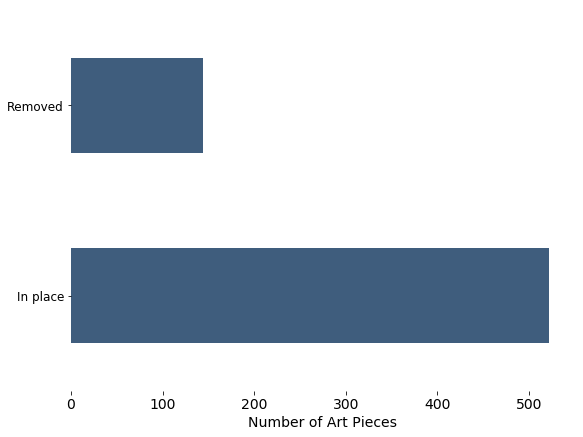

In [11]:
# Let's look at the statuses of art

plotdata(data,'Status')

The majority of art is currently in place.

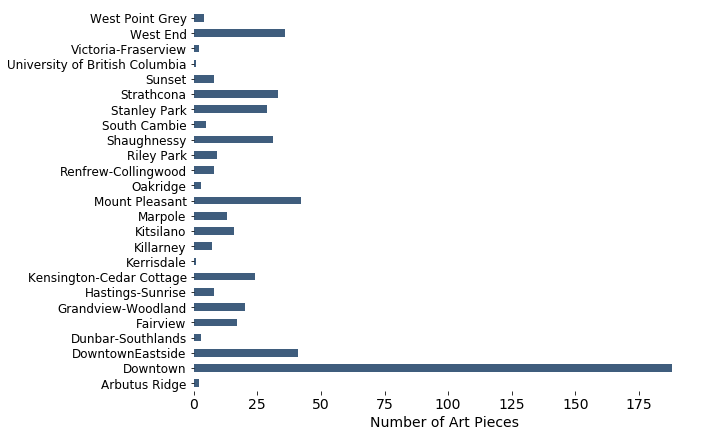

In [12]:
plotdata(data,'Neighbourhood')

By far, the most art, current or past, is in the downtown area. An interesting to look at could be art pieces per capita. The Downtown Eastside and West End, also have a decent amount of art. Mount Pleasant is the non-downtown neighbourhood with the most art.

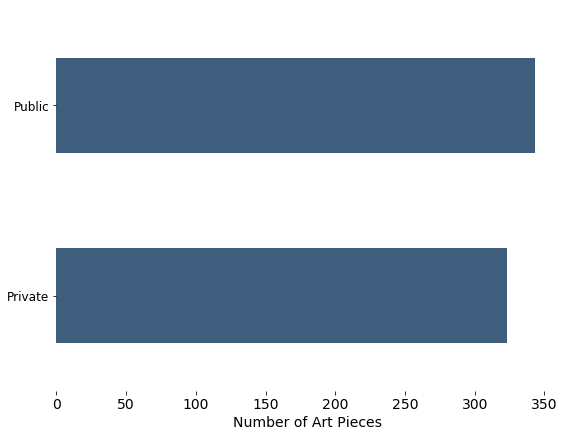

In [13]:
plotdata(data,'PublicPrivate')

The split between public and private art is pretty even, with there being a bit more public art.

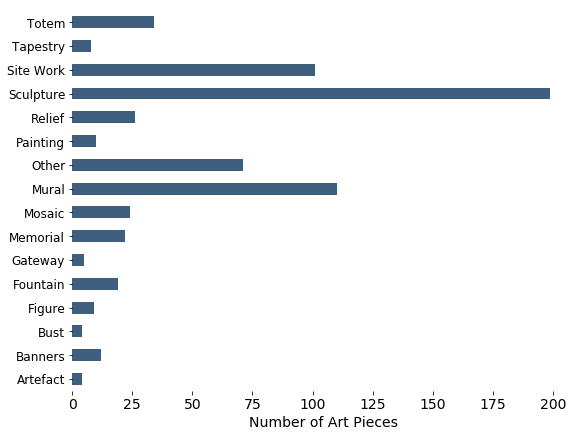

In [14]:
plotdata(data,'Type')

Finally, we look at the type of art exhibit. Sculptures are the most prevelant, with murals coming next. I'm not sure what "Site Work" means.

Next, let's look at the categories and their relative proportions.

In [15]:
import seaborn as sns

In [16]:
def prep_plot(size):
    fig=plt.figure(figsize=size)
    # Remove plot frame lines
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)  
    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    # Ticks on the right and top of the plot are generally unnecessary chartjunk. 
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    return ax

In [17]:
def plotcategories(data, cat1, cat2, size):
    ax = prep_plot(size)
    ax = sns.countplot(y=cat1, hue = cat2, data=data)
    ax.set_ylabel(ylabel = '')
    ax.set_xlabel(xlabel = 'Number of Art Pieces', fontsize = 14)
    return ax

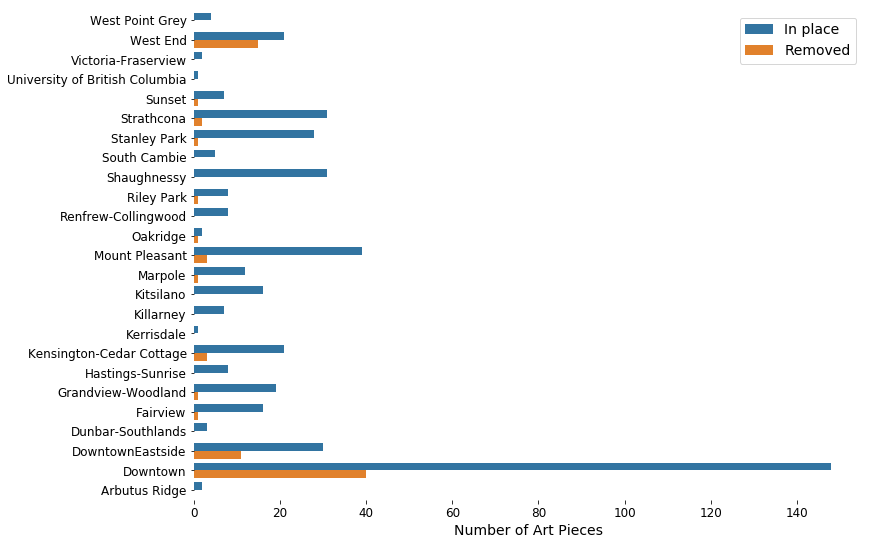

In [18]:
ax = prep_plot((12,9))
ax = sns.countplot(y="Neighbourhood", hue = "Status", data=data, order = nbhds)
ax.set_ylabel(ylabel = '')
ax.set_xlabel(xlabel = 'Number of Art Pieces', fontsize = 14)
plt.legend(loc='upper right', fontsize = 14)

It seems like the majority of art installed actually stays in place, in all areas.

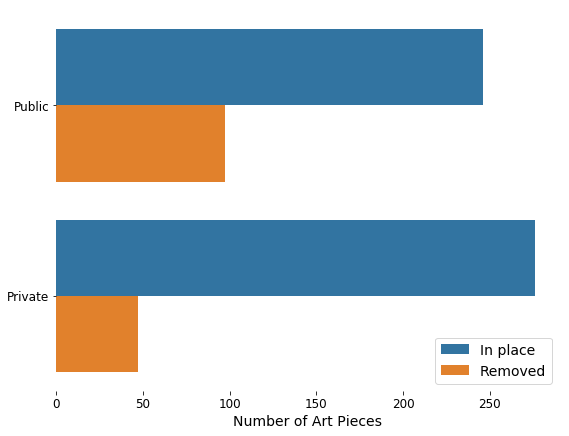

In [19]:
plotcategories(data, "PublicPrivate", "Status", (9,7))
plt.legend(loc='lower right', fontsize = 14)

There is more private art in place than public.

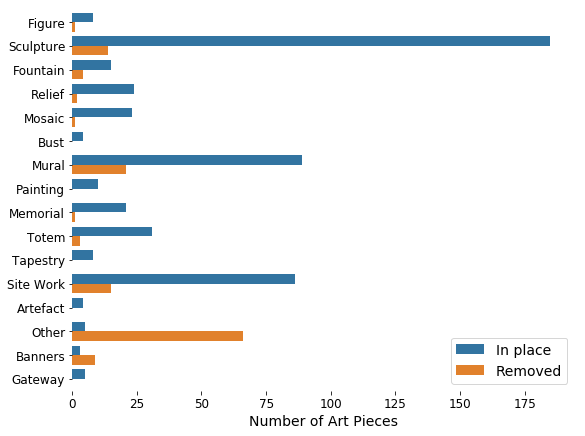

In [20]:
plotcategories(data, "Type", "Status", (9,7))
plt.legend(loc='lower right', fontsize = 14)

Art in the "other" category seems to be temporary.

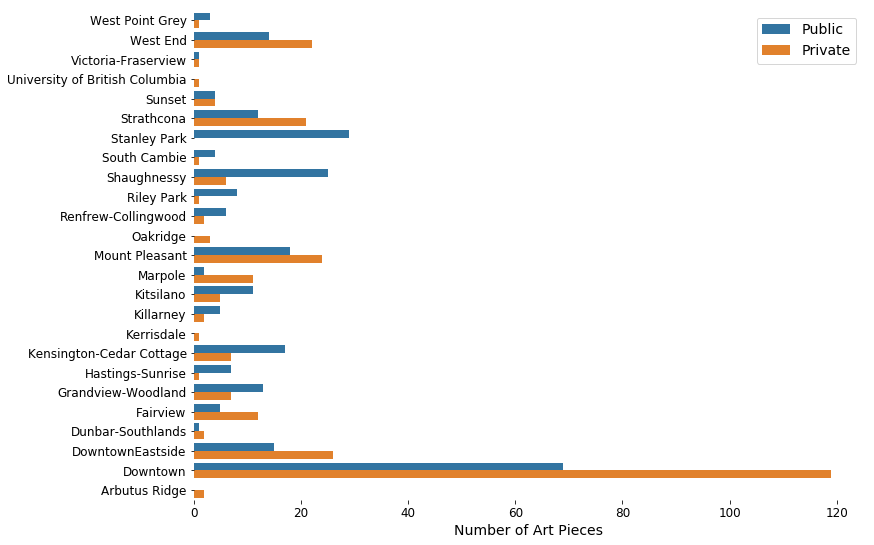

In [21]:
ax = prep_plot((12,9))
ax = sns.countplot(y="Neighbourhood", hue = "PublicPrivate", data=data, order = nbhds)
ax.set_ylabel(ylabel = '')
ax.set_xlabel(xlabel = 'Number of Art Pieces', fontsize = 14)
plt.legend(loc='upper right', fontsize = 14)

More public than private: Kits, South Cambie, Grandview-Woodland, Riley Park, Shaughnessy, Stanley Park (no private art here), Kensington-Cedar Cottage, Hastings-Sunrise, Renfrew-Collingwood, and Killarny. 

Let's look at the proportion of sculptures and murals, since those are the most popular. Site work is the 3rd most popular, but I'm not sure what this means.

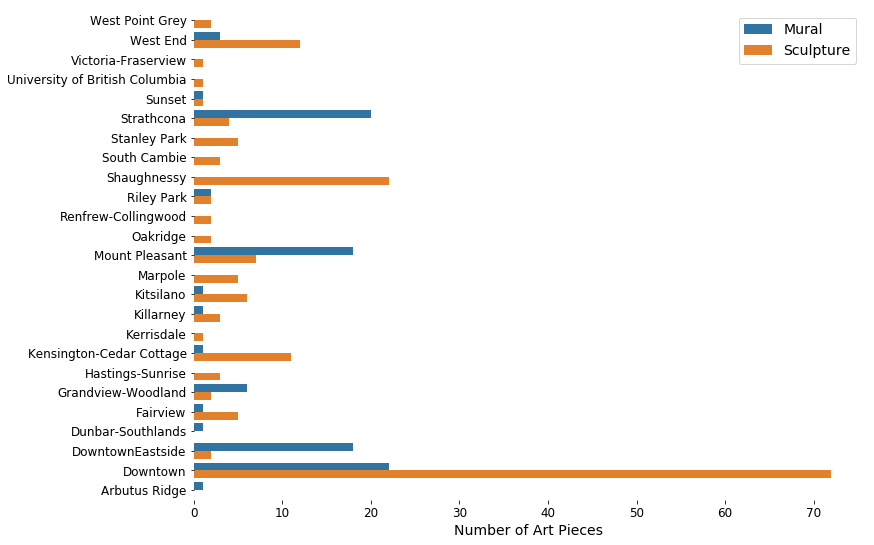

In [22]:
murals = data[data["Type"] == "Mural"]
sculptures = data[data["Type"] == "Sculpture"]
murals_sculptures = murals.append(sculptures, ignore_index=True)
ax = prep_plot((12,9))
ax = sns.countplot(y="Neighbourhood", hue = "Type", data=murals_sculptures, order = nbhds)
ax.set_ylabel(ylabel = '')
ax.set_xlabel(xlabel = 'Number of Art Pieces', fontsize = 14)
plt.legend(loc='upper right', fontsize = 14)

Should look at this more in depth- limit to just a fewe neighbourhoods.

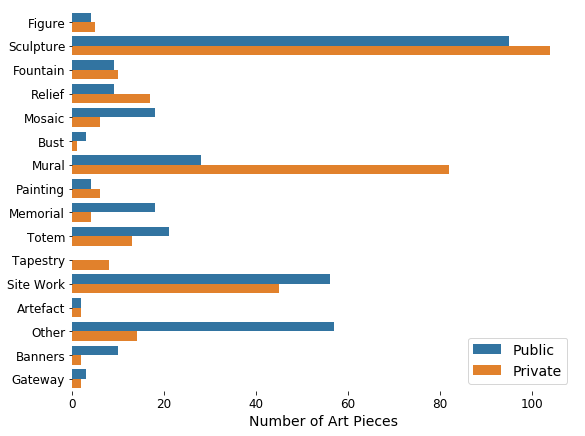

In [23]:
plotcategories(data, "Type", "PublicPrivate", (9,7))
plt.legend(loc='lower right', fontsize = 14)

There are slightly more private sculptures than public, and about 60% more private murals than public. As for "site work" and "other" types of art, more are public.

In [24]:
# Let's refilter the data and remove any where year is 0
# Let's also look at data just since the 80's
data_ = data[data["YearOfInstallation"]!=0]
data_ = data[data["YearOfInstallation"]>=1980]

In [25]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)  

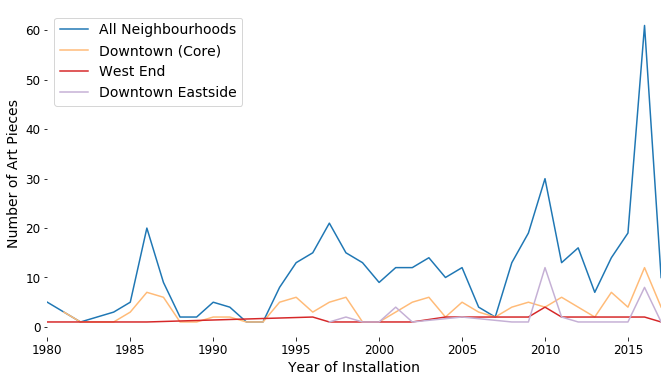

In [26]:
ax = prep_plot((11,6))
all_nbhd = data_.groupby("YearOfInstallation").Neighbourhood.count()
dt_only = data_[data_["Neighbourhood"] == 'Downtown'].groupby("YearOfInstallation").Neighbourhood.count()
westend = data_[data_["Neighbourhood"] == 'West End'].groupby("YearOfInstallation").Neighbourhood.count()
dt_eside = data_[data_["Neighbourhood"] == 'DowntownEastside'].groupby("YearOfInstallation").Neighbourhood.count()
all_nbhd.plot(legend = True, label = 'All Neighbourhoods', color = tableau20[0])
dt_only.plot(legend = True, label = 'Downtown (Core)', color = tableau20[3])
westend.plot(legend = True, label = 'West End', color = tableau20[6])
dt_eside.plot(legend = True, label = 'Downtown Eastside', color = tableau20[9])
plt.legend(loc='upper left', fontsize = 14)
ax.set_xlabel(xlabel = 'Year of Installation', fontsize = 14)
ax.set_ylabel(ylabel = 'Number of Art Pieces', fontsize = 14)

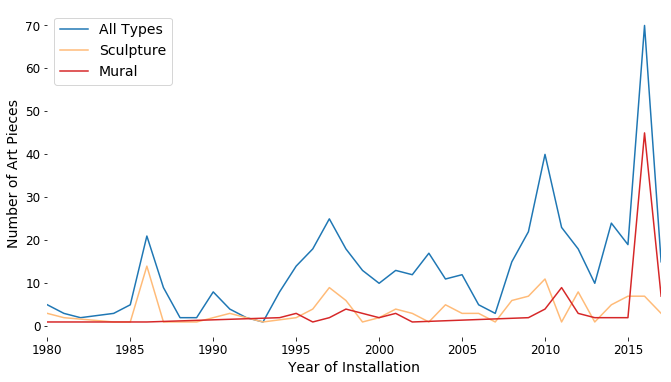

In [27]:
ax = prep_plot((11,6))
all_types = data_.groupby("YearOfInstallation").Type.count()
sculpture = data_[data_["Type"] == 'Sculpture'].groupby("YearOfInstallation").Type.count()
mural = data_[data_["Type"] == 'Mural'].groupby("YearOfInstallation").Type.count()
all_types.plot(legend = True, label = 'All Types', color = tableau20[0])
sculpture.plot(legend = True, label = 'Sculpture', color = tableau20[3])
mural.plot(legend = True, label = 'Mural', color = tableau20[6])
plt.legend(loc='upper left', fontsize = 14)
ax.set_xlabel(xlabel = 'Year of Installation', fontsize = 14)
ax.set_ylabel(ylabel = 'Number of Art Pieces', fontsize = 14)

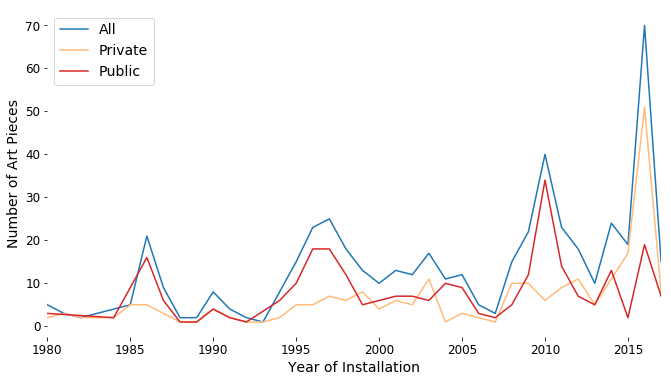

In [28]:
ax = prep_plot((11,6))
all_owners = data_.groupby("YearOfInstallation").PublicPrivate.count()
private = data_[data_["PublicPrivate"] == 'Private'].groupby("YearOfInstallation").PublicPrivate.count()
public = data_[data_["PublicPrivate"] == 'Public'].groupby("YearOfInstallation").PublicPrivate.count()
all_owners.plot(legend = True, label = 'All', color = tableau20[0])
private.plot(legend = True, label = 'Private', color = tableau20[3])
public.plot(legend = True, label = 'Public', color = tableau20[6])
plt.legend(loc='upper left', fontsize = 14)
ax.set_xlabel(xlabel = 'Year of Installation', fontsize = 14)
ax.set_ylabel(ylabel = 'Number of Art Pieces', fontsize = 14)

We can see that during the Olympics, there was a huge spike in public art installations, relative to previous years.

In [29]:
data_2010 = data_[data_["YearOfInstallation"] == 2010]
inplace_2010 = data_2010[data_2010["Status"]=="In place"]
print("Out of " + str(len(data_2010)) + " pieces of public part put in place for the Olympics, " +
      str(len(inplace_2010)) + " remain in place today.")

Out of 40 pieces of public part put in place for the Olympics, 14 remain in place today.


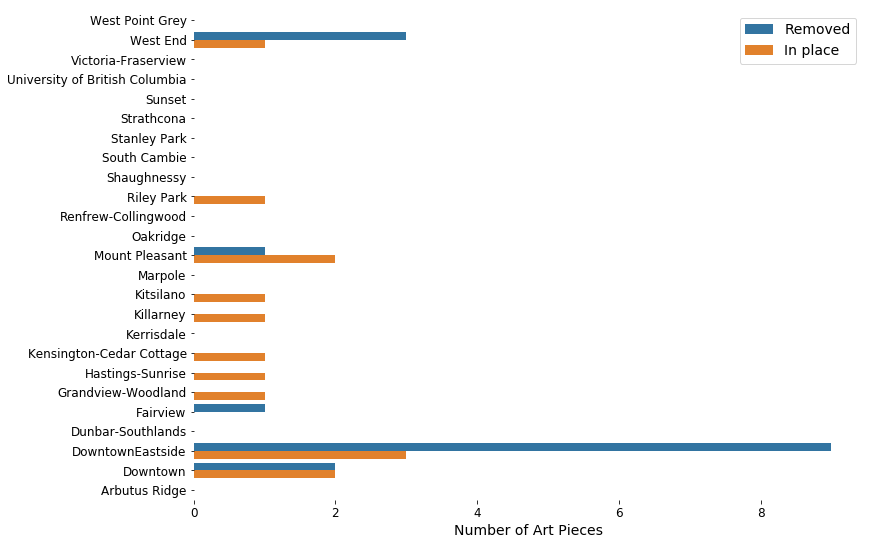

In [30]:
ax = prep_plot((12,9))
ax = sns.countplot(y="Neighbourhood", hue = "Status", data=data_2010, order = nbhds)
ax.set_ylabel(ylabel = '')
ax.set_xlabel(xlabel = 'Number of Art Pieces', fontsize = 14)
plt.legend(loc='upper right', fontsize = 14)

Let's first look at where all the art in Vancouver has been placed, currently, and previously.

In [31]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

In [32]:
# Let's write a function to make this easier for plotting

def plot_map(lats1, lons1, label1, lats2 = None, lons2 = None, label2 = None):    

    plt.figure(figsize=(12,7))
    map = Basemap(projection='merc', lat_0 = 49.25, lon_0 = -123.1,
        resolution = 'h', area_thresh = 0.1,
        llcrnrlon=-123.27, llcrnrlat=49.2022,
        urcrnrlon=-123.028, urcrnrlat=49.32)

    map.drawcoastlines()
    map.drawcountries()
    map.fillcontinents(color="#d0d1ef")
    map.bluemarble()
    map.drawmapboundary()

    lons1 = list(lons1)
    lats1 = list(lats1)
    x1,y1 = map(lons1[1:], lats1[1:])
    x1_, y1_ = map(lons1[0], lats1[0])
    map.plot(x1_,y1_, 'o', markersize = 2, label = label1, color = "#d80d24")
    map.plot(x1, y1, 'o', markersize=2, color = "#d80d24")
    
    try:    
        lons2 = list(lons2)
        lats2 = list(lats2)        
        x2,y2 = map(lons2[1:], lats2[1:])
        x2_, y2_ = map(lons2[0], lats2[0])
        map.plot(x2_,y2_, 'o', markersize = 2, label = label2, color = "#0d8ad8") 
        map.plot(x2,y2, 'o', markersize = 2, color = "#0d8ad8") 
 
    except:
        pass  
        
    plt.legend(prop={'size': 16})

In [33]:
def category_map(data, col, cat1, cat2):
    
    cat1_art = data[data[col] == cat1]
    cat2_art = data[data[col] == cat2]
                    
    lats1 = cat1_art["Latitude"]
    lons1 = cat1_art["Longitude"]
                    
    lats2 = cat2_art["Latitude"]
    lons2 = cat2_art["Longitude"]
    
    plot_map(lats1, lons1, cat1, lats2, lons2, cat2)   

In [34]:
# Before plotting, need to clean the longitude and latitude data
data_loc = data[~data["Longitude"].isnull()]
data_loc = data_loc[~data_loc["Latitude"].isnull()]
lons = data_loc["Longitude"]
lats = data_loc["Latitude"]

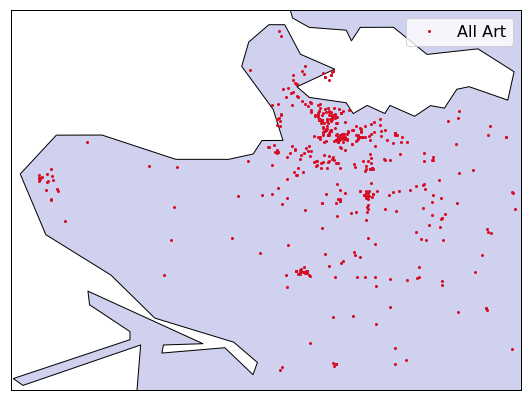

In [35]:
# Map of all past and present art locations, without filtering.
plot_map(lats1=lats, lons1=lons, label1 = 'All Art')

So you can see, as we saw previously, the majority of art is located downtown. Not much is in the westside, where I grew up!

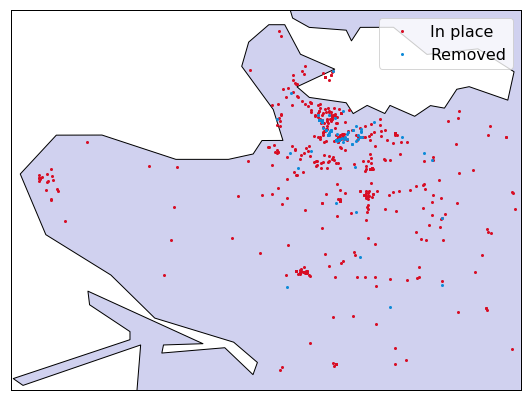

In [36]:
# Map of all past and present art locations.
category_map(data_loc, "Status", "In place", "Removed")

So you can see the large number of art that's been taken away in the downtown area, around what seems to be the Olympic village.

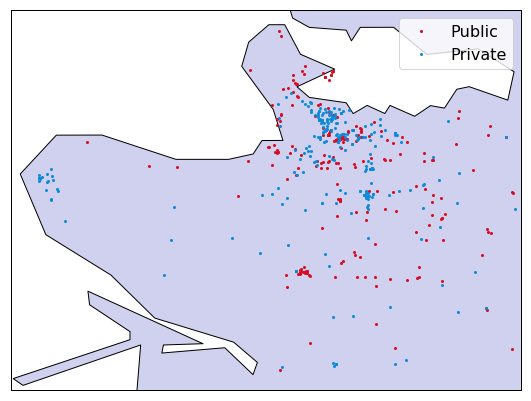

In [37]:
# Map of art, by ownership.
category_map(data_loc, "PublicPrivate", "Public", "Private")

We can see the distribution of publicly and privately owned art. Along the beaches, notably, there isn't any private art- this makes sense. No one lives right at the beach.

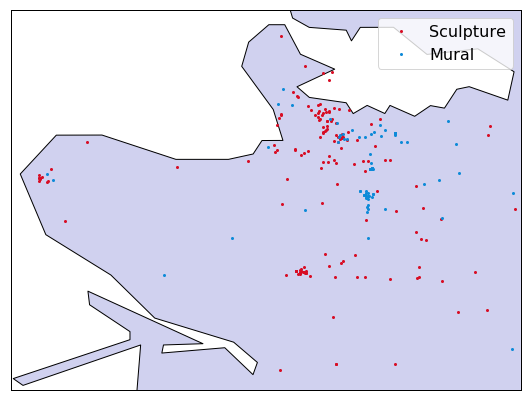

In [38]:
# Since sculptures and murals are the most popular, let's see where those are.
# Also, let's just look at currently existing art.
category_map(data_loc[data_loc["Status"] == "In place"], "Type", "Sculpture", "Mural")

Wee see a concentration of murals around Main street- makes sense.

In [39]:
# Look more at 2010

# Before plotting, need to clean the longitude and latitude data
data_loc_2010 = data_2010[~data_2010["Longitude"].isnull()]
data_loc_2010 = data_2010[~data_2010["Latitude"].isnull()]
lons = data_loc_2010["Longitude"]
lats = data_loc_2010["Latitude"]

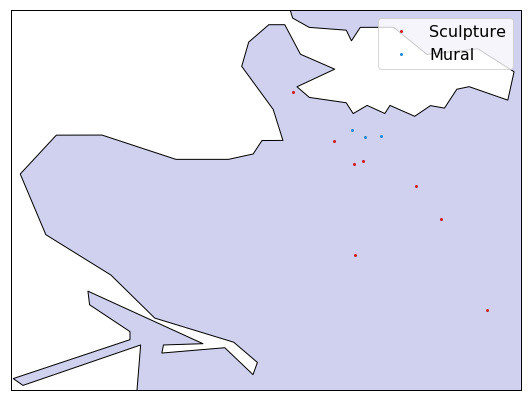

In [40]:
# Since sculptures and murals are the most popular, let's see where those are.
# Also, let's just look at currently existing art.
category_map(data_loc_2010[data_loc_2010["Status"] == "In place"], "Type", "Sculpture", "Mural")

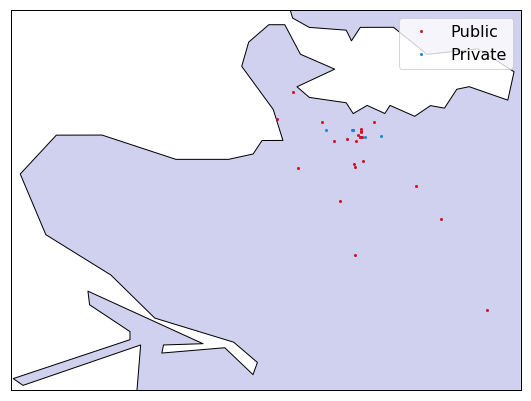

In [41]:
# Map of art, by ownership.
category_map(data_loc_2010, "PublicPrivate", "Public", "Private")

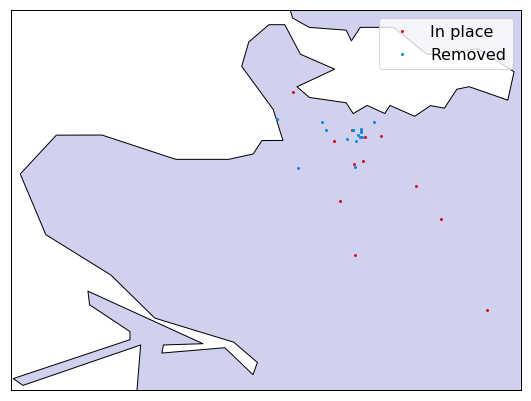

In [42]:
# Map of all past and present art locations.
category_map(data_loc_2010, "Status", "In place", "Removed")